In [1]:
from read import *
import sympy as sp

In [2]:
# The field at 0,0,0 in FS coordinates for the magnet is 5.3810473e-07
nominalfield = 5.3810473e-07

In [3]:
# Data for the fringe only
data = np.loadtxt("BEM_analyzer/eval/elena/fringe/evaluate_h_3_p_3.csv", skiprows=1, delimiter=',')
localpos = np.loadtxt("BEM_analyzer/eval/elena/fringe/localpos.csv", skiprows=1, delimiter=',')

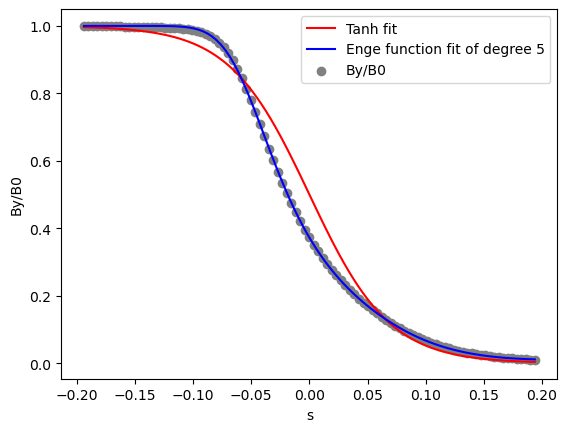

In [4]:
elenamagnet = Magnet(data, localpos, nominalfield)
#elenamagnet.plot("By")

#elenamagnet.plot_x(0,0)
#plt.show()
#elenamagnet.plot_y(0,0)
#plt.show()
#elenamagnet.plot_s(0,0)
#plt.show()

fig, ax = plt.subplots()
#elenamagnet.fit_b1_poly(ax=ax)
tanhparams = elenamagnet.fit_tanh(ax=ax)
engeparams = elenamagnet.fit_b1_enge(ax=ax)

In [5]:
print(engeparams)
print(tanhparams)

[-3.85190565e+03  1.29508736e+03 -1.29954076e+02  2.50076967e+01
  5.22942000e-01]
[0.06893195]


In [6]:
# Calculate the fringe field integral
x = np.linspace(-0.2, 0.2, 1000)
g = 0.076  # mm
K = -np.trapezoid(x, Enge(x, *engeparams)*(1-Enge(x, *engeparams))) / g
print(f"The fringe field integral is K = {K}")

The fringe field integral is K = 0.39563215891262615


The fringe field integral is K = 0.39563215891262615
$\implies$ This seems reasonable

In [7]:
x = sp.Symbol('x')
np.poly1d(engeparams)(x)

x*(x*(x*(1295.08736383155 - 3851.9056462889*x) - 129.954075536744) + 25.0076967338159) + 0.52294199988415

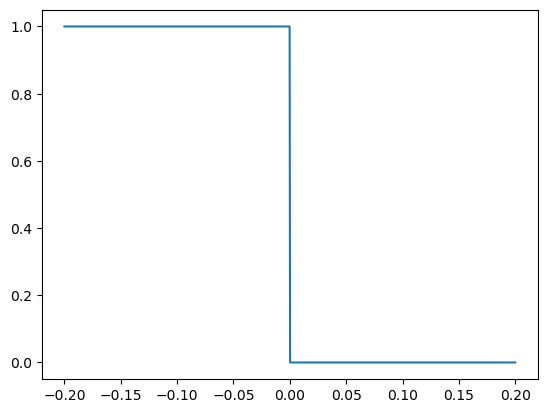

In [18]:
plt.plot(x, np.heaviside(-x, 0))

In [26]:
x = np.linspace(-0.2, 0.2, 1000)
g = 0.076  # mm
rho = 0.927
b0 = 1/rho
K0gg = np.trapezoid(x, x * (np.heaviside(-x, 0)-Enge(x, *engeparams))) * b0
print(-K0gg)

-0.0014599011581963666


LinkedArrayCpu([1., 1., 1., 1., 1.])